### Tratamento de dados - Fatores de Virulência.

##### Neste notebook iremos realizar o tratamento dos dados de saída do PathoFact para compreender como se dá os fatores de virulência presentes em cada amostra.

In [24]:
# Iremos importar as bibliotecas necessárias
# Para criação do dataframe
import pandas as pd
import glob
import os
import seaborn as sns # essa é a biblioteca mais importante para o tratamento de dados


# Para uso gráfico
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [25]:
# Defina o caminho para o diretório onde os arquivos .tsv estão localizados
dir_all = ['PathoFact_report_1month',
           'PathoFact_report_6month',
           'PathoFact_report_colostrum',
           'PathoFact_report_LM1']

dataframes = []

# Percorre cada diretório e lê todos os arquivos .tsv
for diretorio in dir_all:
    arquivos_tsv = glob.glob(os.path.join(diretorio, '*.tsv'))
    dataframes.extend([pd.read_csv(arquivo, sep='\t') for arquivo in arquivos_tsv])

# Concatena todos os DataFrames em um único DataFrame
virulence_concat = pd.concat(dataframes, ignore_index=True)


In [26]:
# E qual é saída desse dado?
display(virulence_concat)

,ORF,ORF_ID,Virulence_HMM_prediction,Virulence_classifier_prediction,Virulence_prediction,Signal_peptide,Virulence_confidence_level,group
0,1_1,1,pathogenic,negative,unclassified,N,4: Potential Non-secreted Virulence factor,baby_1month
1,1_2,2,pathogenic,negative,unclassified,N,4: Potential Non-secreted Virulence factor,baby_1month
2,1_3,3,pathogenic,pathogenic,pathogenic,N,2: Non-secreted Virulence factor,baby_1month
3,2_1,4,negative,pathogenic,unclassified,N,4: Potential Non-secreted Virulence factor,baby_1month
4,2_2,5,pathogenic,pathogenic,pathogenic,N,2: Non-secreted Virulence factor,baby_1month
...,...,...,...,...,...,...,...,...
304585,357_1,618,pathogenic,pathogenic,pathogenic,N,2: Non-secreted Virulence factor,LM1
304586,357_2,619,negative,negative,non_pathogenic,N,-,LM1
304587,357_3,620,negative,negative,non_pathogenic,N,-,LM1
304588,359_1,621,negative,negative,non_pathogenic,N,-,LM1


### Histograma

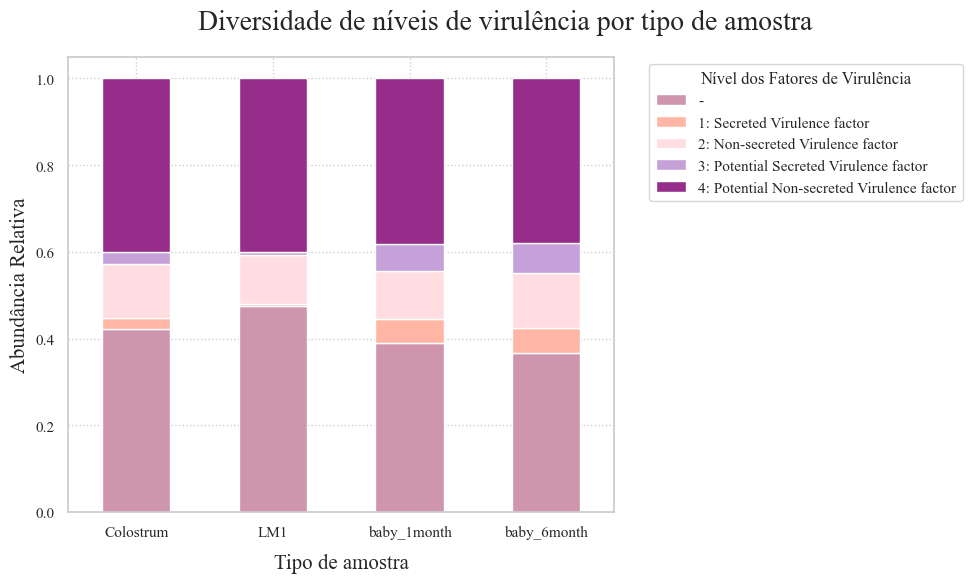

In [27]:
# Configurações de estilo
sns.set_context("notebook")
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['font.family'] = 'Times New Roman'

# Definindo as cores das barras com os códigos hexadecimais da sua escola
cores_personalizadas = ['#ce95ac', '#ffb6a5', '#ffdde0', '#c6a0d8', '#962d8a']  # Substitua pelos códigos corretos

# Passo 1: Contar a ocorrência de cada classe por grupo
class_counts = virulence_concat.groupby(['group', 'Virulence_confidence_level']).size().unstack(fill_value=0)

# Passo 2: Calcular a abundância relativa
class_relative_abundance = class_counts.div(class_counts.sum(axis=1), axis=0)

# Passo 3: Plotar as barras empilhadas com cores personalizadas
ax = class_relative_abundance.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores_personalizadas)

# Ajustar rótulos e título
plt.ylabel("Abundância Relativa", fontsize=15)
plt.xlabel("Tipo de amostra", fontsize=15, labelpad=10)
plt.title("Diversidade de níveis de virulência por tipo de amostra", fontsize=20, pad=20, x=0.8)

# Rotacionar os rótulos no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Ajustar a posição da legenda e a margem superior para centralizar o título
plt.legend(title='Nível dos Fatores de Virulência', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.85)
plt.tight_layout()

# Exibir e salvar o gráfico
plt.savefig("diversidade_virulencia.png")
plt.show()

### Potenciais fatores de virulência secretados

In [28]:
# Filtrar as linhas onde a coluna "Virulence_confidence_level" é igual a "3: Potential Secreted Virulence factor"
filtered_virulence = virulence_concat[virulence_concat['Virulence_confidence_level'] == '3: Potential Secreted Virulence factor']

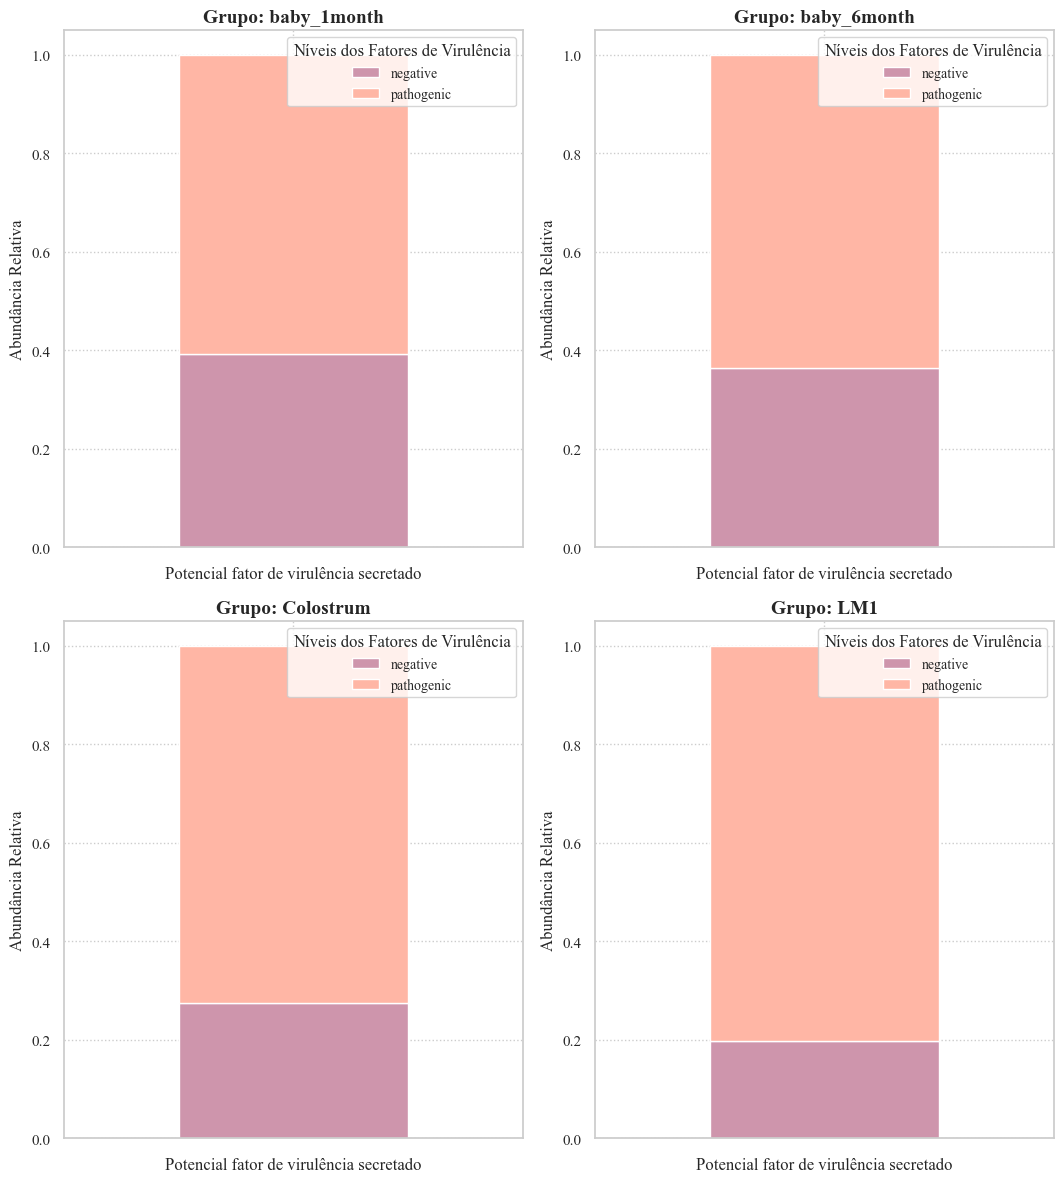

In [60]:
# Passo 2: Criar uma figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Obter os grupos únicos
groups = filtered_virulence['group'].unique()

for i, group in enumerate(groups):
    ax = axes[i // 2, i % 2]  # Selecionar o subplot adequado (2x2)
    
    # Filtrar os dados para o grupo específico
    group_data = filtered_virulence[filtered_virulence['group'] == group]
    
    # Contar a ocorrência de cada classe por grupo
    class_counts = group_data.groupby(['Virulence_confidence_level', 'Virulence_classifier_prediction']).size().unstack(fill_value=0)
    
    # Calcular a abundância relativa
    class_relative_abundance = class_counts.div(class_counts.sum(axis=1), axis=0)
    
    # Plotar o histograma empilhado
    class_relative_abundance.plot(kind='bar', stacked=True, ax=ax, color=cores_personalizadas)
    ax.set_ylabel("Abundância Relativa", fontsize=12)
    ax.set_xlabel("Potencial fator de virulência secretado", fontsize=12)
    ax.set_title(f"Grupo: {group}", fontsize=14, fontweight='bold')
    
    # Ajustar a legenda dentro do gráfico
    ax.legend(title="Níveis dos Fatores de Virulência", title_fontsize=12, fontsize=10, loc='upper right')

    # Remover os rótulos do eixo x
    ax.set_xticklabels([])

# Ajustar layout para garantir que tudo seja exibido corretamente
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar o layout para a legenda interna
plt.savefig('virulence_factors.png')
plt.show()


### Fatores de virulência secretados

In [30]:
# Filtrar as linhas onde a coluna "Virulence_confidence_level" é igual a "3: Potential Secreted Virulence factor"
filtered_virulence_secreted = virulence_concat[virulence_concat['Virulence_confidence_level'] ==  '1: Secreted Virulence factor']

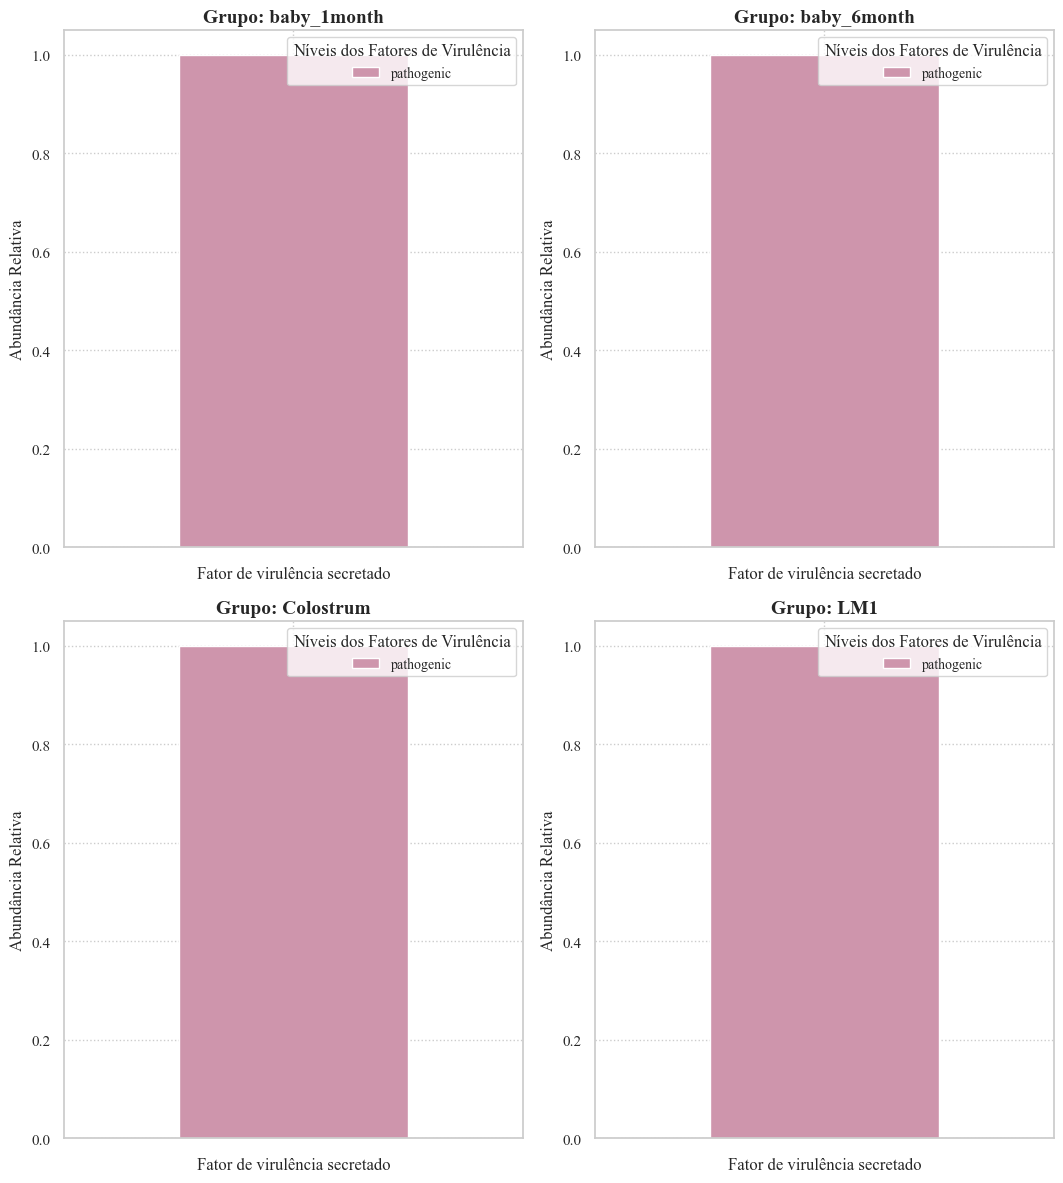

In [62]:
#Passo 2: Criar uma figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Obter os grupos únicos
groups = filtered_virulence_secreted['group'].unique()

for i, group in enumerate(groups):
    ax = axes[i // 2, i % 2]  # Selecionar o subplot adequado (2x2)
    
    # Filtrar os dados para o grupo específico
    group_data = filtered_virulence_secreted[filtered_virulence_secreted['group'] == group]
    
    # Contar a ocorrência de cada classe por grupo
    class_counts = group_data.groupby(['Virulence_confidence_level', 'Virulence_classifier_prediction']).size().unstack(fill_value=0)
    
    # Calcular a abundância relativa
    class_relative_abundance = class_counts.div(class_counts.sum(axis=1), axis=0)
    
    # Plotar o histograma empilhado
    class_relative_abundance.plot(kind='bar', stacked=True, ax=ax, color=cores_personalizadas)
    ax.set_ylabel("Abundância Relativa")
    
    # Remover rótulos do eixo x para evitar texto vertical
    ax.set_xlabel("Fator de virulência secretado")  # Título do eixo x em horizontal
    ax.set_xticklabels([])  # Remove os rótulos dos ticks no eixo x
    
    ax.set_title(f"Grupo: {group}", fontsize=14, fontweight='bold')
    ax.legend(title="Níveis dos Fatores de Virulência", title_fontsize=12, fontsize=10, loc='upper right')


# Ajustar layout para garantir que tudo seja exibido corretamente
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar o layout para a legenda externa
plt.savefig('virulence_factors_secreted.png')
plt.show()